In [2]:
import pandas as pd


In [3]:
import matplotlib as plt

In [4]:
df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv')

In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
68268,1,2019-01-01 07:01:20,2019-01-31 14:29:21,1,1.2,1,N,48,163,2,6.5,0.0,0.5,0.00,0.0,0.3,7.30,0.0
579459,1,2019-01-03 21:43:46,2019-01-03 21:45:47,1,0.6,1,N,263,141,1,4.0,0.0,0.5,1.50,0.0,0.3,6.30,0.0
579460,1,2019-01-03 21:49:22,2019-01-03 21:59:12,1,2.2,1,N,263,151,1,10.0,0.0,0.5,1.00,0.0,0.3,11.80,0.0
592224,1,2019-01-03 22:04:40,2019-01-03 22:16:15,1,2.5,1,N,238,246,1,11.0,0.0,0.5,2.35,0.0,0.3,14.15,0.0
592225,1,2019-01-03 22:24:36,2019-01-27 10:41:17,1,1.1,1,N,50,170,1,8.5,0.0,0.5,1.85,0.0,0.3,11.15,0.0


In [7]:
df.shape

(2811814, 18)

In [8]:
df.payment_type.value_counts()

1    2058647
2     737184
3      12119
4       3864
Name: payment_type, dtype: int64

In [9]:
df = df[df.payment_type != 2]

In [10]:
df.payment_type.value_counts()

1    2058647
3      12119
4       3864
Name: payment_type, dtype: int64

In [11]:
df.shape

(2074630, 18)

In [12]:
def binary_creator(value):
    if value>0:
        return 1
    else:
        return 0

In [13]:
df.tip_amount = df.tip_amount.apply(binary_creator)

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
579459,1,2019-01-03 21:43:46,2019-01-03 21:45:47,1,0.6,1,N,263,141,1,4.0,0.0,0.5,1,0.0,0.3,6.30,0.0
579460,1,2019-01-03 21:49:22,2019-01-03 21:59:12,1,2.2,1,N,263,151,1,10.0,0.0,0.5,1,0.0,0.3,11.80,0.0
592224,1,2019-01-03 22:04:40,2019-01-03 22:16:15,1,2.5,1,N,238,246,1,11.0,0.0,0.5,1,0.0,0.3,14.15,0.0
592225,1,2019-01-03 22:24:36,2019-01-27 10:41:17,1,1.1,1,N,50,170,1,8.5,0.0,0.5,1,0.0,0.3,11.15,0.0
872659,1,2019-01-05 03:36:02,2019-01-05 03:38:17,1,0.4,1,N,217,217,1,3.5,0.5,0.5,0,0.0,0.3,4.80,0.0


In [18]:
df = df[df.notna()]

In [98]:
df.shape

(2074630, 20)

In [19]:
import seaborn as sns

In [20]:
df.tip_amount.value_counts()

1    1977001
0      97629
Name: tip_amount, dtype: int64

In [21]:
df.rename(columns = {'tip_amount':'tip'},inplace=True)

In [41]:
tiny = df.sample(frac=.01)

In [42]:
tiny

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
7597373,2,2019-01-31 19:25:45,2019-01-31 19:43:39,1,4.61,1,N,246,87,1,17.0,1.0,0.5,1,0.00,0.3,22.56,0.0
7467020,1,2019-01-31 11:45:07,2019-01-31 12:02:19,1,1.30,1,N,163,161,1,11.5,0.0,0.5,1,0.00,0.3,14.76,0.0
5155399,2,2019-01-22 14:26:55,2019-01-22 14:48:31,1,2.51,1,N,163,107,1,15.0,0.0,0.5,1,0.00,0.3,19.75,0.0
7340731,2,2019-01-30 20:46:31,2019-01-30 20:50:21,1,0.39,1,N,65,65,1,4.5,0.5,0.5,1,0.00,0.3,7.30,0.0
5028946,1,2019-01-21 23:12:31,2019-01-21 23:28:51,1,8.90,1,N,138,164,1,25.5,0.5,0.5,1,5.76,0.3,39.06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669132,1,2019-01-24 14:13:55,2019-01-24 14:21:47,1,1.00,1,N,79,148,1,7.0,0.0,0.5,1,0.00,0.3,8.80,0.0
6153844,2,2019-01-26 03:03:58,2019-01-26 03:10:41,2,1.54,1,N,79,113,1,7.5,0.5,0.5,1,0.00,0.3,9.80,0.0
5243163,2,2019-01-22 20:28:45,2019-01-22 20:45:06,1,4.76,1,N,144,142,1,16.5,0.5,0.5,1,0.00,0.3,21.36,0.0
7057014,1,2019-01-29 20:34:34,2019-01-29 20:45:19,1,1.60,1,N,162,48,1,9.0,0.5,0.5,1,0.00,0.3,12.35,0.0


In [43]:
tiny.tip.value_counts()

1    19791
0      955
Name: tip, dtype: int64

In [96]:
df.congestion_surcharge.value_counts()

0.0    2074607
2.5         23
Name: congestion_surcharge, dtype: int64

In [22]:
cols = list(df.columns)

In [23]:
cols.insert(0,cols.pop(cols.index('tip')))

In [53]:
tiny = tiny[cols]

In [24]:
df = df[cols]

In [25]:
cols

['tip',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge']

In [59]:
tinydf = tiny[['tip','VendorID','passenger_count','trip_distance','payment_type',
              'fare_amount']]

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


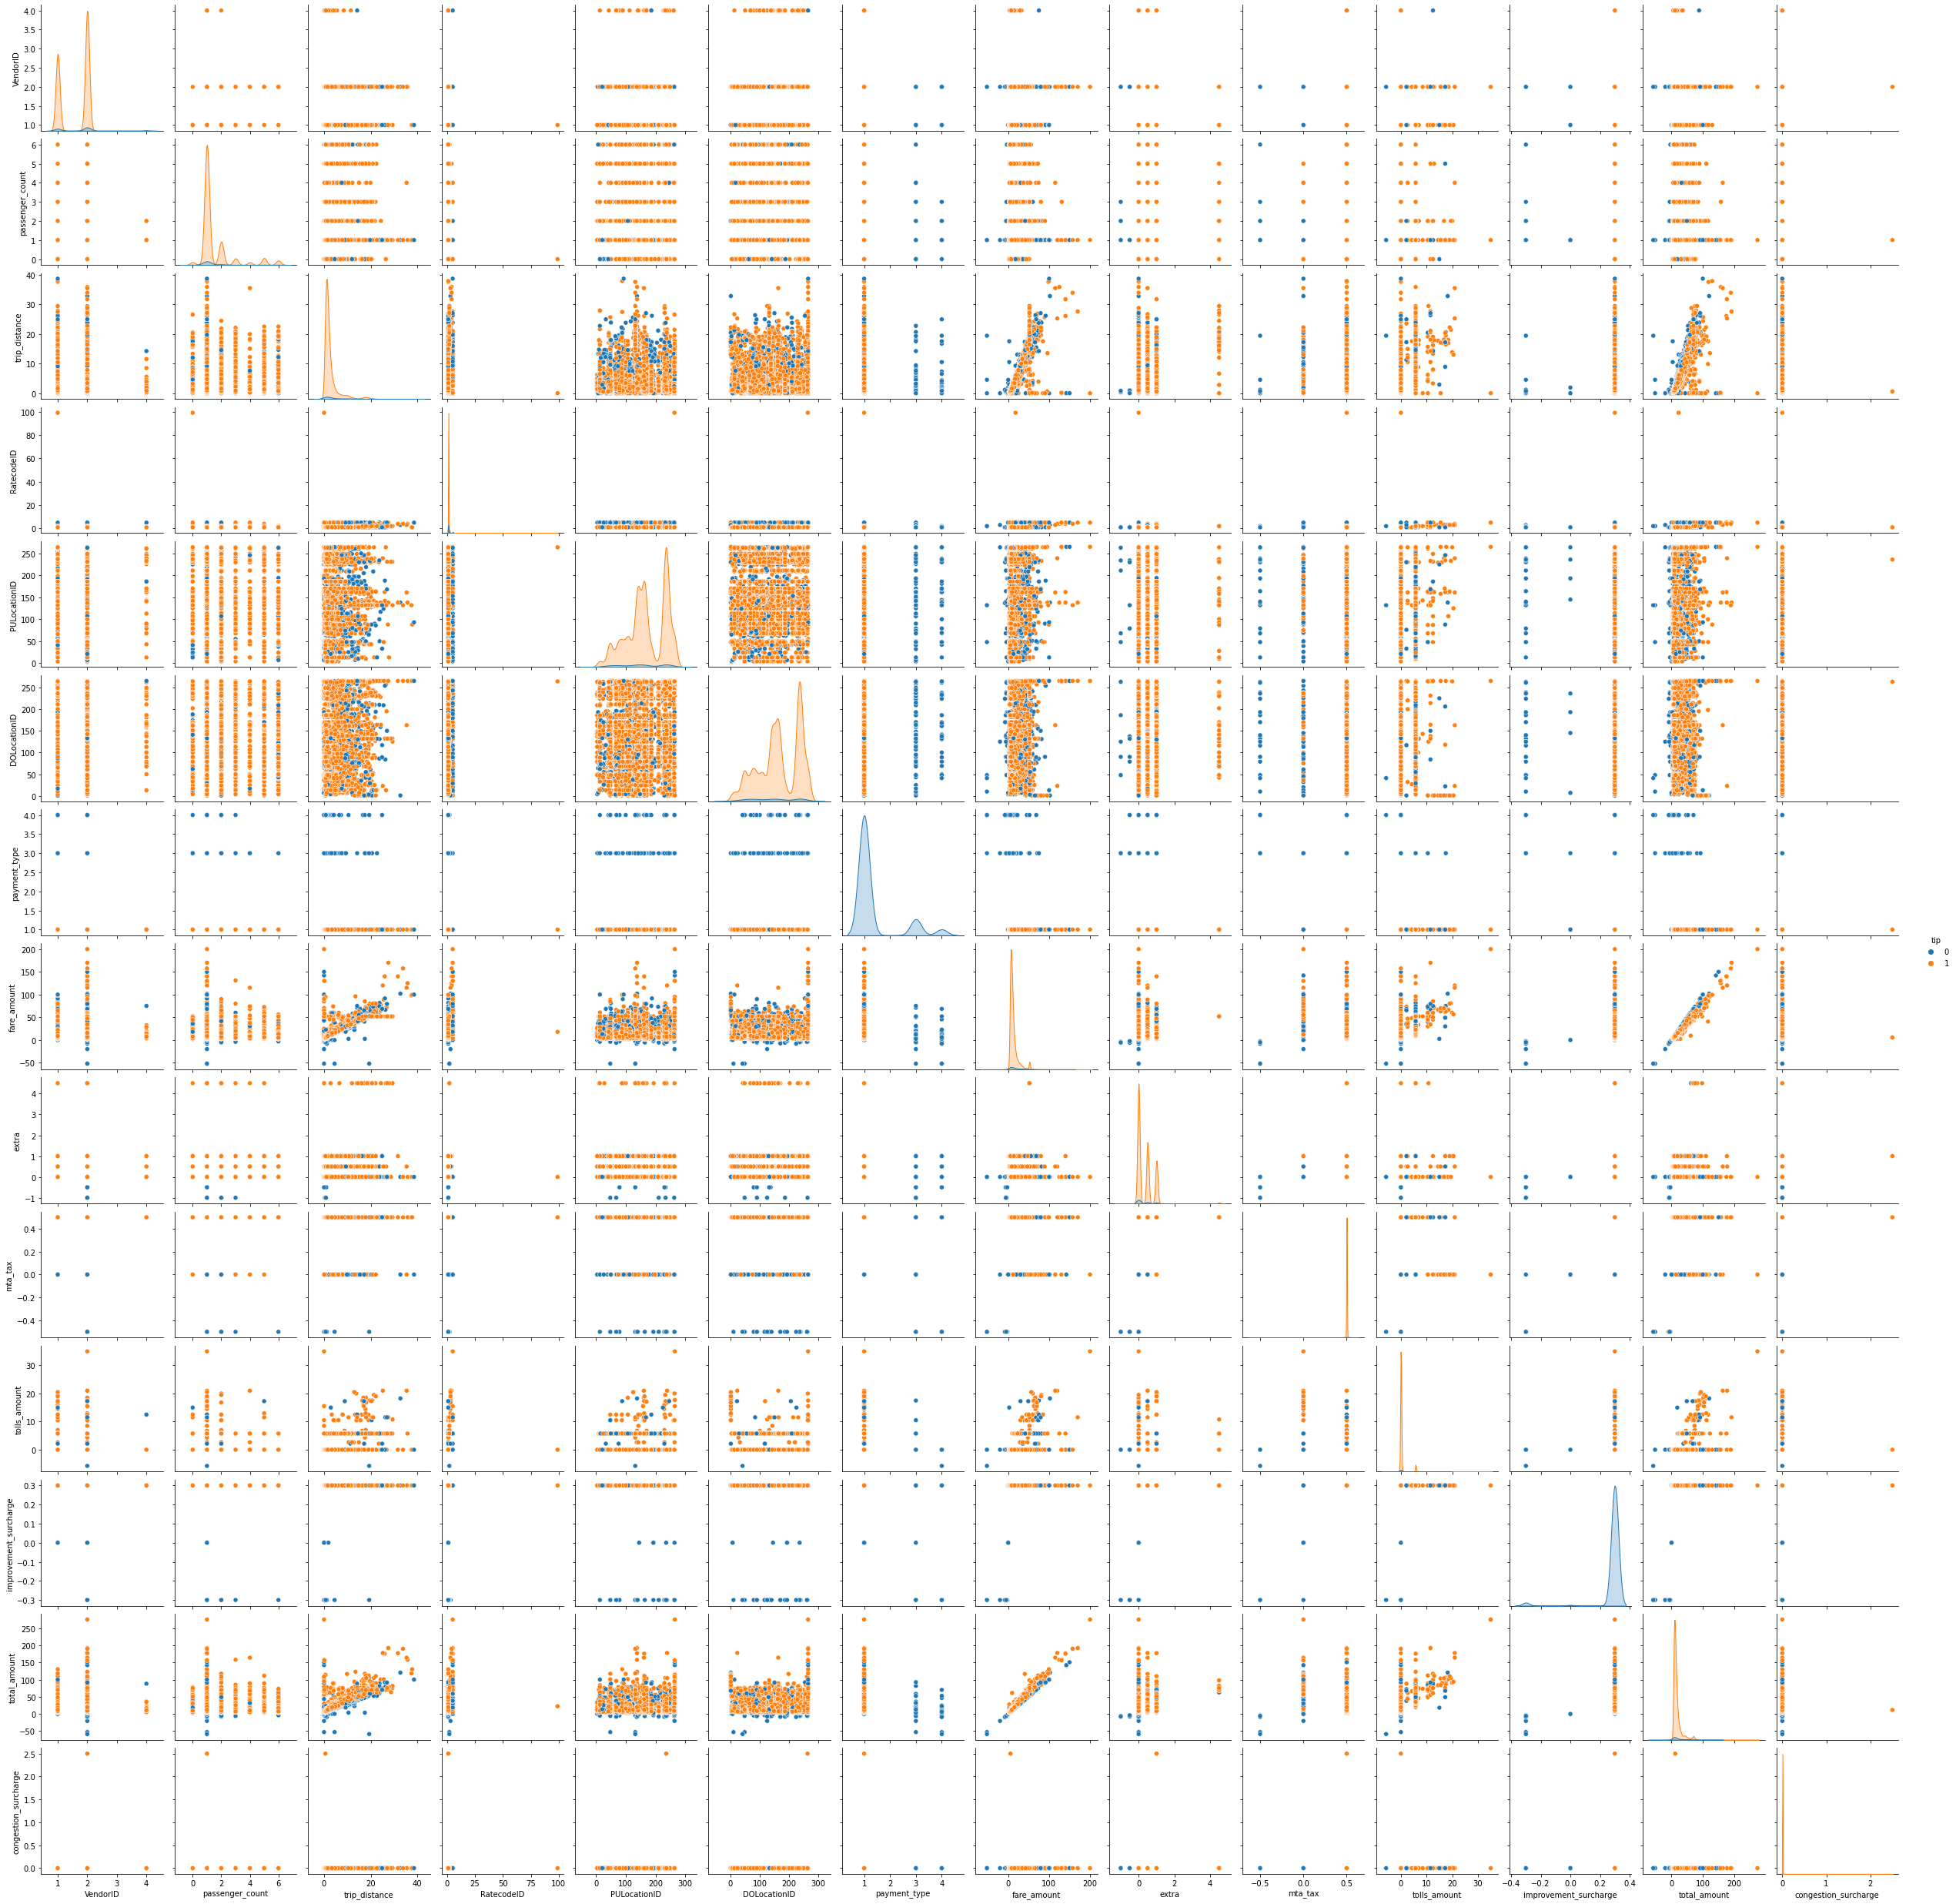

In [62]:
sns.pairplot(tiny, hue='tip')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074630 entries, 0 to 2074629
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tip                    int64  
 1   vendorid               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        int64  
 5   trip_distance          float64
 6   ratecodeid             int64  
 7   store_and_fwd_flag     object 
 8   pickup_location_id     int64  
 9   dropoff_location_id    int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  pickup_borough         object 
 19  dropoff_borough        object 
dtypes: float64(8), int64(7), object(5)
memory usage: 332.4+ MB


In [27]:
locationdf = pd.read_csv('locations.csv')

In [28]:
locationdf

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [29]:
df.shape

(2074630, 18)

In [30]:
df.rename(columns={'PULocationID':'LocationID'}, inplace=True)

In [31]:
df = pd.merge(df, locationdf[['LocationID','Borough']], how='left', on='LocationID')

In [32]:
df.head(1)

,tip,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,LocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Borough
0,1,1,2019-01-03 21:43:46,2019-01-03 21:45:47,1,0.6,1,N,263,141,1,4.0,0.0,0.5,0.0,0.3,6.3,0.0,Manhattan


In [33]:
df.rename(columns={'Borough':'pickup_borough', 'LocationID':'pickup_location_id',
                  'DOLocationID':'LocationID'}, inplace=True)

In [34]:
df = pd.merge(df, locationdf[['LocationID','Borough']], how='left', on='LocationID')

In [35]:
df.head(1)

,tip,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,pickup_location_id,LocationID,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_borough,Borough
0,1,1,2019-01-03 21:43:46,2019-01-03 21:45:47,1,0.6,1,N,263,141,1,4.0,0.0,0.5,0.0,0.3,6.3,0.0,Manhattan,Manhattan


In [36]:
df.rename(columns={'Borough':'dropoff_borough','LocationID':'dropoff_location_id'},inplace=True)

In [37]:
df.head(1)

,tip,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_borough,dropoff_borough
0,1,1,2019-01-03 21:43:46,2019-01-03 21:45:47,1,0.6,1,N,263,141,1,4.0,0.0,0.5,0.0,0.3,6.3,0.0,Manhattan,Manhattan


In [38]:
df.columns = df.columns.str.lower()

In [30]:
df.to_csv(r'/Users/MichaelHarnett/Desktop/METIS/Projects\prelim.csv')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler



In [33]:
df.head(1)

,tip,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_borough,dropoff_borough
0,0,1,2019-01-01 07:01:20,2019-01-31 14:29:21,1,1.2,1,N,48,163,2,6.5,0.0,0.5,0.0,0.3,7.3,0.0,Manhattan,Manhattan


In [40]:
X, y = df[['vendorid','passenger_count','trip_distance','ratecodeid','pickup_location_id',
          'dropoff_location_id','payment_type','fare_amount','extra','mta_tax',
          'tolls_amount','total_amount','congestion_surcharge']], df.tip

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=7)

<AxesSubplot:xlabel='tip', ylabel='trip_distance'>

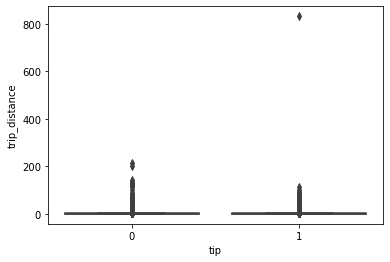

In [43]:
sns.boxplot(x='tip', y='trip_distance', data=df)

# First LogReg

In [42]:
std = StandardScaler()

In [43]:
logreg1 = LogisticRegression()

In [44]:
logreg1.fit(X_train, y_train)
logreg1.score(X_train, y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9973561550734348

In [48]:
logreg1.score(X_test, y_test)

0.9961092746144394

In [45]:
preds = logreg1.predict(X_test)

In [46]:
log_matrix = confusion_matrix(y_test, preds)

<AxesSubplot:>

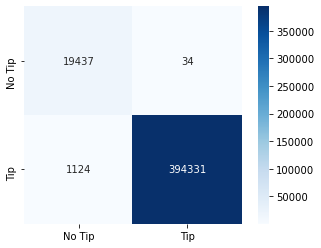

In [47]:
plt.figure
sns.heatmap(log_matrix, annot=True, cmap='Blues', square=True, fmt='d',
           xticklabels=['No Tip', 'Tip'],
           yticklabels=['No Tip','Tip'])



In [48]:
log_matrix

array([[ 19437,     34],
       [  1124, 394331]])

In [66]:
precison = precision_score(preds, y)

In [49]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, preds), 
                                                     recall_score(y_test, preds)))

Precision: 0.9999,   Recall: 0.9972


In [50]:
from sklearn.metrics import log_loss,f1_score

In [51]:
print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, logreg1.predict_proba(X_test))))

Log-loss on logit: 0.0112


# Log 2
scaling features

In [54]:
std = StandardScaler()

In [57]:
std.fit(X_train)

StandardScaler()

In [59]:
X_train_scaled, X_test_scaled = std.transform(X_train), std.transform(X_test)

In [64]:
logreg2 = LogisticRegression()

In [66]:
logreg2.fit(X_train_scaled, y_train)
logreg2.score(X_train_scaled, y_train)


0.9976977822551492

In [73]:
preds2 = logreg2.predict(X_test_scaled)
confusion_matrix2 = confusion_matrix(y_test, preds2)


In [74]:
confusion_matrix2

array([[ 19457,     14],
       [   999, 394456]])

### changing the 'solving' method, as per the earlier warning

In [67]:
logreg3 = LogisticRegression(solver='sag')

In [68]:
logreg3.fit(X_train_scaled, y_train)
logreg3.score(X_train_scaled, y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.9699121048090503

In [71]:
preds3 = logreg3.predict(X_test_scaled)
confusion_matrix3 = confusion_matrix(y_test,preds3)

In [75]:
confusion_matrix3

array([[  7408,  12063],
       [   385, 395070]])

In [76]:
logreg4 = LogisticRegression(solver='saga')

In [77]:
logreg4.fit(X_train_scaled, y_train)
logreg4.score(X_train_scaled, y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


0.967576748625056

In [80]:
preds4 = logreg4.predict(X_test_scaled)
confusion_matrix4 = confusion_matrix(y_test, preds4)
confusion_matrix4

array([[  6381,  13090],
       [   308, 395147]])

In [79]:
X_train_scaled.shape

(1659704, 13)

### leaving original solver but changing max iterations
much more precise

In [87]:
logreg5 = LogisticRegression(max_iter=1000)

In [88]:
logreg5.fit(X_train_scaled, y_train)
logreg5.score(X_train_scaled, y_train)

0.9976977822551492

In [89]:
preds5 = logreg5.predict(X_test_scaled)

In [90]:
confusion5 = confusion_matrix(y_test, preds5)
confusion5

array([[ 19457,     14],
       [   999, 394456]])

In [91]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, preds5), 
                                                     recall_score(y_test, preds5)))

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, logreg1.predict_proba(X_test))))

Precision: 1.0000,   Recall: 0.9975
Log-loss on logit: 0.0112


In [92]:
y

0          1
1          1
2          1
3          1
4          0
          ..
2074625    1
2074626    0
2074627    0
2074628    0
2074629    0
Name: tip, Length: 2074630, dtype: int64

In [94]:
X_test

,vendorid,passenger_count,trip_distance,ratecodeid,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tolls_amount,total_amount,congestion_surcharge
1770988,1,1,10.80,1,138,50,1,36.0,1.0,0.5,5.76,48.56,0.0
177337,1,1,13.70,1,124,263,1,51.5,0.0,0.5,5.76,58.06,0.0
1418495,1,1,0.90,1,142,230,1,6.0,1.0,0.5,0.00,8.97,0.0
2047030,1,1,1.40,1,75,42,1,6.0,0.5,0.5,0.00,9.30,0.0
150097,2,1,1.47,1,141,161,1,7.0,0.0,0.5,0.00,9.36,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206549,2,1,9.18,1,138,68,1,36.5,0.0,0.5,5.76,53.06,0.0
1352568,2,1,0.38,1,238,239,1,4.5,0.0,0.5,0.00,6.30,0.0
1668734,1,1,1.10,1,230,170,1,8.0,0.0,0.5,0.00,9.80,0.0
489172,2,1,2.33,1,236,239,1,9.5,0.5,0.5,0.00,13.50,0.0


In [97]:
df.payment_type.value_counts()

1    2058647
3      12119
4       3864
Name: payment_type, dtype: int64

In [105]:
df.head(1)

,tip,vendorid,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_borough,dropoff_borough
0,1,1,2019-01-03 21:43:46,2019-01-03 21:45:47,1,0.6,1,N,263,141,1,4.0,0.0,0.5,0.0,0.3,6.3,0.0,Manhattan,Manhattan


In [102]:
df.rename(columns={'tpep_pickup_datetime':'pickup_datetime','tpep_dropoff_datetime':'dropoff_datetime'},inplace=True)

In [103]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [107]:
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

In [108]:
import datetime as dt

In [115]:
df.pickup_datetime.dt.day_name

<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x7faad9e9a850>>

In [114]:
df.loc[0]['pickup_datetime']

Timestamp('2019-01-03 21:43:46')

In [119]:
df['day_name'] = df.pickup_datetime.dt.day_name()

In [124]:
df.head()

,tip,vendorid,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pickup_location_id,dropoff_location_id,...,extra,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_borough,dropoff_borough,day_name,day_of_pickup
0,1,1,2019-01-03 21:43:46,2019-01-03 21:45:47,1,0.6,1,N,263,141,...,0.0,0.5,0.0,0.3,6.30,0.0,Manhattan,Manhattan,Thursday,3
1,1,1,2019-01-03 21:49:22,2019-01-03 21:59:12,1,2.2,1,N,263,151,...,0.0,0.5,0.0,0.3,11.80,0.0,Manhattan,Manhattan,Thursday,3
2,1,1,2019-01-03 22:04:40,2019-01-03 22:16:15,1,2.5,1,N,238,246,...,0.0,0.5,0.0,0.3,14.15,0.0,Manhattan,Manhattan,Thursday,3
3,1,1,2019-01-03 22:24:36,2019-01-27 10:41:17,1,1.1,1,N,50,170,...,0.0,0.5,0.0,0.3,11.15,0.0,Manhattan,Manhattan,Thursday,3
4,0,1,2019-01-05 03:36:02,2019-01-05 03:38:17,1,0.4,1,N,217,217,...,0.5,0.5,0.0,0.3,4.80,0.0,Brooklyn,Brooklyn,Saturday,5


In [123]:
df['day_of_pickup'] = df.pickup_datetime.dt.dayofweek

In [130]:
df['week_of_moth'] = df.pickup_datetime.dt.weekofyear

<ipython-input-130-25638c92108a>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week_of_moth'] = df.pickup_datetime.dt.weekofyear


In [132]:
df.head()

,tip,vendorid,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pickup_location_id,dropoff_location_id,...,mta_tax,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_borough,dropoff_borough,day_name,day_of_pickup,week_of_moth
0,1,1,2019-01-03 21:43:46,2019-01-03 21:45:47,1,0.6,1,N,263,141,...,0.5,0.0,0.3,6.30,0.0,Manhattan,Manhattan,Thursday,3,1
1,1,1,2019-01-03 21:49:22,2019-01-03 21:59:12,1,2.2,1,N,263,151,...,0.5,0.0,0.3,11.80,0.0,Manhattan,Manhattan,Thursday,3,1
2,1,1,2019-01-03 22:04:40,2019-01-03 22:16:15,1,2.5,1,N,238,246,...,0.5,0.0,0.3,14.15,0.0,Manhattan,Manhattan,Thursday,3,1
3,1,1,2019-01-03 22:24:36,2019-01-27 10:41:17,1,1.1,1,N,50,170,...,0.5,0.0,0.3,11.15,0.0,Manhattan,Manhattan,Thursday,3,1
4,0,1,2019-01-05 03:36:02,2019-01-05 03:38:17,1,0.4,1,N,217,217,...,0.5,0.0,0.3,4.80,0.0,Brooklyn,Brooklyn,Saturday,5,1


In [135]:
df.week_of_moth.value_counts()

4    1280583
5     793746
3        290
1         11
Name: week_of_moth, dtype: int64